## Projectile Motion with Air Drag

In [9]:
import numpy as np
from pylab import plot,show,xlabel,ylabel
import math
import matplotlib.pyplot as plt

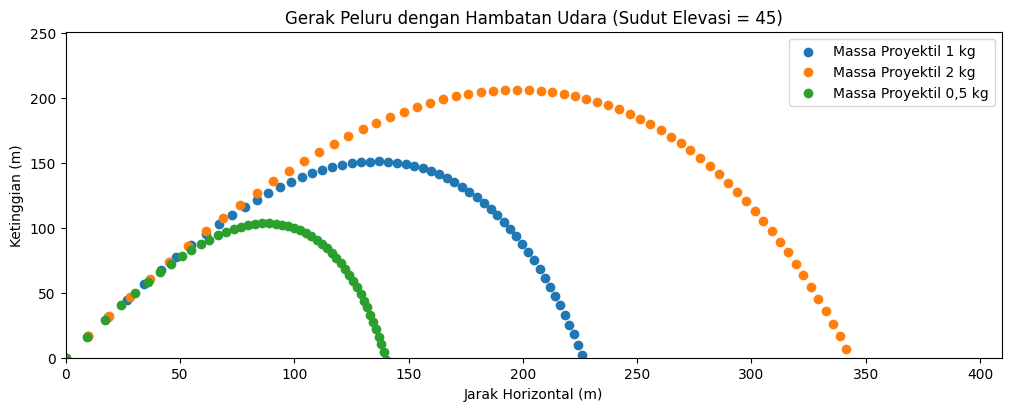

In [37]:
g=9.81
#m=0.5
R=0.07

def DegtoRad(alpha):
    return alpha*math.pi/180

angle=DegtoRad(60)
v_0=100
rho=1.22
C=0.47
c=math.pi*R**2*rho*C/2
def overallconstant(mass):
    return c/mass
    

def f(r,t,m):
    vx=r[1]
    vy=r[3]
    v=math.sqrt(vx**2+vy**2)
    return np.array([vx,-overallconstant(m)*vx*v,vy,-g-overallconstant(m)*vy*v],float)

h=0.2
tpoints=np.arange(0,20,h)


def trajectory(m):
    xpoints=[]
    ypoints=[]
    r=np.array([0,v_0*math.cos(angle),0,v_0*math.sin(angle)],float)
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[2])
        k1=h*f(r,t,m)
        k2=h*f(r+0.5*k1,t+0.5*h,m)
        k3=h*f(r+0.5*k2,t+0.5*h,m)
        k4=h*f(r+k3,t+h,m)
        r+=(k1+2*k2+2*k3+k4)/6
    return np.array(xpoints,float),np.array(ypoints,float)


tr1x,tr1y=trajectory(1)
tr2x,tr2y=trajectory(2)
tr3x,tr3y=trajectory(0.5)


fig,ax=plt.subplots(figsize=(10, 4), layout='constrained')
ax.scatter(tr1x,tr1y,label='Massa Proyektil 1 kg')
ax.scatter(tr2x,tr2y,label='Massa Proyektil 2 kg')
ax.scatter(tr3x,tr3y,label='Massa Proyektil 0,5 kg')
ax.legend()
plt.ylim([0,max(tr1y)+100])
plt.xlim([0,max(tr2x)])
ax.set_ylabel('Ketinggian (m)')
ax.set_xlabel('Jarak Horizontal (m)')
ax.set_title('Gerak Peluru dengan Hambatan Udara (Sudut Elevasi = 45)')
plt.show()

4